In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('girls.csv', sep=';')
df.head()

,Month,Year,G,T,B,L,W
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


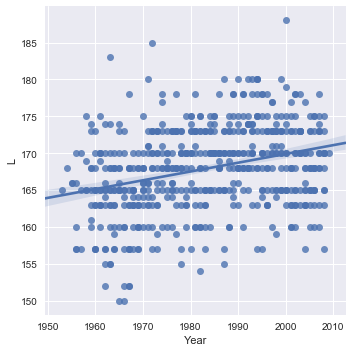

In [25]:
sns.lmplot(x='Year', y='L', data=df)

In [26]:
# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже. Это очень удобно при тестировании
np.random.seed(seed=666)

In [28]:
#нужно удалить столбцы которые не нужны для кластеризации
df.iloc[:,2:7].head()

,G,T,B,L,W
0,91,61,91,165,54
1,86,61,89,168,54
2,91,61,91,166,52
3,91,61,91,166,52
4,91,61,86,157,48


In [29]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=2)
clustering.fit(df.iloc[:,2:7])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
clustering.labels_
# так можно посмотреть список меток кластеров наших объектов

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1,

In [31]:
df['cluster']=clustering.labels_# так мы добавляем новый столбец (с метками кластеров) в таблицу
df.head()

,Month,Year,G,T,B,L,W,cluster
0,December,1953,91,61,91,165,54,1
1,March,1954,86,61,89,168,54,1
2,July,1955,91,61,91,166,52,1
3,December,1955,91,61,91,166,52,1
4,July,1956,91,61,86,157,48,0


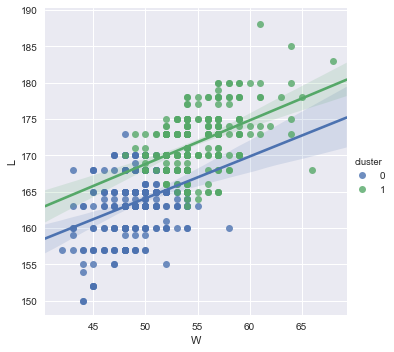

In [32]:
#посмотрим, чем отличаются девушки из разных кластеров
%matplotlib inline
sns.lmplot(x='W', y='L', hue='cluster',data=df)


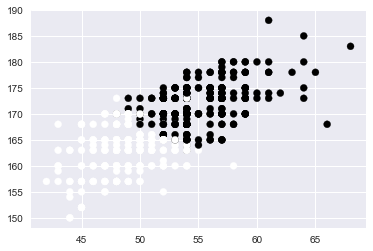

In [33]:
plt.scatter(df['W'],df['L'],c=df['cluster'])#просто рисует пары значений признаков

# Домашка
1. Дано множество объектов, характеризуемых одним (!) признаком. То есть объекты представляются точками на числовой прямой. Создать массив значений признаков объектов, и вместо таблиц работать с этим массивом. Нужно данные разбить на k кластеров, реализовав самостоятельно одну итерацию алгоритма k-means (нормировать данные не нужно).
2. Запустить полученный выше алгоритм в цикле, пока кластеры не стабилизируются. На экран вывести пары: (значение признака, номер кластера).
Совет: при тестировании алгоритма сгенерируйте три массива, значения которы принадлежат соответственно интервалам [0,1] [2,3]  [4,5]. ОБъединим их в один массив - его и будем кластеризовать. И запустите разбиение данных на три кластера. Всегда ли алгоритм находит "естественное разбиение объектов на кластеры".